#Ant-Hill Problem

##Boundary-less random movement. Food at specific coordinates on an infinite grid.....

##Simulation to prove which probability distribution would best imitate the process......

In [1]:
import numpy as np
import pandas as pd
import random
from random import randint
import matplotlib.pyplot as plt

In [2]:
array_of_vectors = []

for _ in range(10000): #dummy index since not used inside loop
    # Create a vector of zeros of length 4
    vector_i = np.zeros(4)

    # Randomly choose an index to set to 1
    random_index = randint(0, 3)
    vector_i[random_index] = 1

    # Append the vector to the list
    array_of_vectors.append(vector_i)

# Convert the list to np_array
array_of_vectors_np = np.array(array_of_vectors)


In [3]:
# N minus S and E minus W.
# Now we want a large array of (vectors of 2 components)
# Each component is made up of 1st-2nd component of vector_i and 3rd-4th component of vector_i


N_SE_W_array = np.zeros((10000,2))

for j in range(10000):
  N_SE_W_array[j][0] = array_of_vectors_np[j][0] - array_of_vectors_np[j][1]
  N_SE_W_array[j][1] = array_of_vectors_np[j][2] - array_of_vectors_np[j][3]


In [4]:
N_SE_W_array[0:8]

array([[ 0., -1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0., -1.],
       [-1.,  0.],
       [ 1.,  0.]])

In [5]:
# For n = 0
# food targets are located at (2,2); (2,-2); (-2,2); (-2,-2)

N_SE_W_array_cumulative = np.zeros((10000, 2))
N_SE_W_array_cumulative[0] = N_SE_W_array[0]

for i in range(1,10000):
  N_SE_W_array_cumulative[i] = N_SE_W_array_cumulative[i-1] + N_SE_W_array[i]




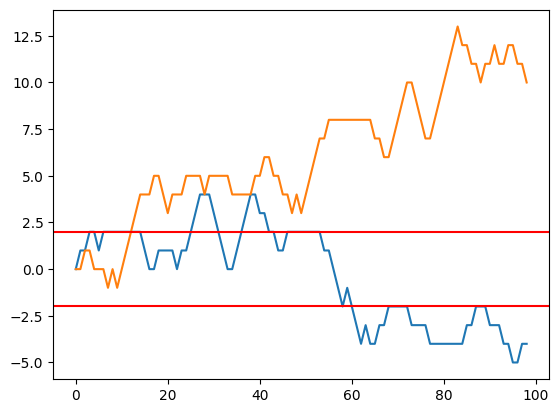

In [6]:
plt.plot(N_SE_W_array_cumulative[1:100, 0])
plt.plot(N_SE_W_array_cumulative[1:100, 1])
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.show()

In [7]:
# Initialize a variable to record the iteration
iteration_both_components_2 = None

# Iterate through the N_SE_W_array_cumulative
for i in range(len(N_SE_W_array_cumulative)):
    # Check if both components' absolute values are 2
    if abs(N_SE_W_array_cumulative[i][0]) == 2 and abs(N_SE_W_array_cumulative[i][1]) == 2:
        iteration_both_components_2 = i
        break  # Stop the loop as we found the first occurrence

# Check if we found an iteration and print the result
if iteration_both_components_2 is not None:
    print(f"Iteration where both components reach 2: {iteration_both_components_2}")
else:
    print("No iteration found where both components simultaneously reach 2.")

Iteration where both components reach 2: 13


In [8]:
iterations_record = []
n_seeds = 10000
n_runs = 100000

for seed in range(n_seeds):
    random.seed(seed)  # Set the seed for random number generation
    array_of_vectors = []

    for _ in range(n_runs): #dummy index since not used inside loop
        # Create a vector of zeros of length 4
        vector_i = np.zeros(4)

        # Randomly choose an index to set to 1
        random_index = randint(0, 3)
        vector_i[random_index] = 1

        # Append the vector to the list
        array_of_vectors.append(vector_i)

    # Convert the list to np_array
    array_of_vectors_np = np.array(array_of_vectors)

    # N minus S and E minus W.
    # Now we want a large array of (vectors of 2 components)
    # Each component is made up of 1st-2nd component of vector_i and 3rd-4th component of vector_i


    N_SE_W_array = np.zeros((n_runs,2))

    for j in range(n_runs):
      N_SE_W_array[j][0] = array_of_vectors_np[j][0] - array_of_vectors_np[j][1]
      N_SE_W_array[j][1] = array_of_vectors_np[j][2] - array_of_vectors_np[j][3]


    # For n = 0
    # food targets are located at (2,2); (2,-2); (-2,2); (-2,-2)

    N_SE_W_array_cumulative = np.zeros((n_runs, 2))
    N_SE_W_array_cumulative[0] = N_SE_W_array[0]

    for i in range(1,n_runs):
      N_SE_W_array_cumulative[i] = N_SE_W_array_cumulative[i-1] + N_SE_W_array[i]



    # Initialize a variable to record the iteration
    iteration_both_components_2 = None

    # Iterate through the N_SE_W_array_cumulative
    for i in range(len(N_SE_W_array_cumulative)):
        # Check if both components' absolute values are 2
        if abs(N_SE_W_array_cumulative[i][0]) == 2 and abs(N_SE_W_array_cumulative[i][1]) == 2:
            iteration_both_components_2 = i
            break  # Stop the loop as we found the first occurrence


    # Check if we found an iteration and print the result
    if iteration_both_components_2 is not None:
        print(f"Iteration where both components reach 2: {iteration_both_components_2}")
    else:
        iteration_both_components_2 = n_runs+1         #random high value assignment.....better imputing required
        print("No iteration found where both components simultaneously reach 2.")


    iterations_record.append(iteration_both_components_2)









Streaming output truncated to the last 5000 lines.
Iteration where both components reach 2: 19
Iteration where both components reach 2: 63
Iteration where both components reach 2: 199
No iteration found where both components simultaneously reach 2.
Iteration where both components reach 2: 553
Iteration where both components reach 2: 5
Iteration where both components reach 2: 9
No iteration found where both components simultaneously reach 2.
Iteration where both components reach 2: 147
Iteration where both components reach 2: 3
No iteration found where both components simultaneously reach 2.
No iteration found where both components simultaneously reach 2.
Iteration where both components reach 2: 27
Iteration where both components reach 2: 55
Iteration where both components reach 2: 17
Iteration where both components reach 2: 41
Iteration where both components reach 2: 7
Iteration where both components reach 2: 19
No iteration found where both components simultaneously reach 2.
Iteration

7776.1476
10000


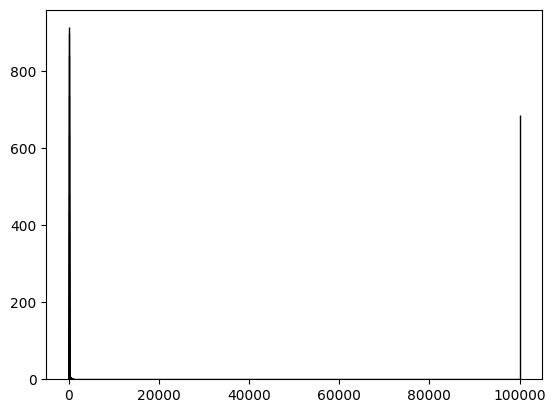

In [13]:
print(np.mean(iterations_record))   #should give us an estimate of lambda of poisson....???
print(len(iterations_record))

plt.hist(iterations_record, bins=100000, color='skyblue', edgecolor='black')
plt.show()

In [21]:
vals, counts = np.unique(iterations_record, return_counts=True)
mode_value = np.argwhere(counts == np.max(counts))


vals[mode_value]



array([[5]])